# Image Processing 101 with python

## Getting started with cv, numpy and scipy

### 1. Resize an image 

We resize an image to extract or remove artifacts. 
This can be done by increasing or decreasing the total number of pixels.
Image interpolation occurs when you resize or distort your image from one pixel grid to another.

Interpolation works by using known data to estimate values at unknown points. 
Image interpolation works in two directions, and tries to achieve a best approximation of a pixel's intensity based on the values at surrounding pixels. 

#### Resizing the NVIDIA LOGO

The following code will perform the resize operation using bicubic interpolation technique

<img src="nvidia.JPG" />

In [1]:
import cv2
import numpy as np

img = cv2.imread('nvidia.JPG',1)
#res = cv2.resize(img,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)

height, width = img.shape[:2]
res = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)

cv2.imwrite('nvidia_resized.JPG',res)

True

<img src="nvidia_resized.JPG" />

### 2. Cropping
#### Cropping using sci-py libraries

Cropping works by resizing an the image array

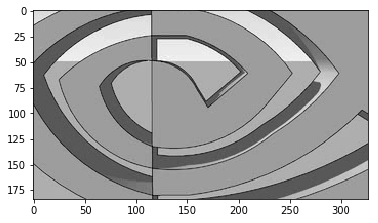

In [12]:
from scipy import ndimage
from scipy import misc
from skimage import color
from skimage import io

import matplotlib.pyplot as plt

f = color.rgb2gray(io.imread('nvidia.JPG'))
lx,ly = f.shape
crop_face = f[lx // 4 : -lx // 4, ly // 4: -ly // 4]

plt.imshow(crop_face,cmap = plt.get_cmap('gray'))
plt.show()

#### Cropping using sci-py libraries - PIL libraries

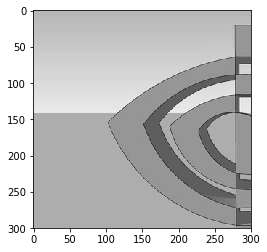

In [3]:
from PIL import Image

img = Image.open('nvidia.JPG').convert('LA')
area = (0,0,300,300)
cropped_img = img.crop(area)

plt.imshow(cropped_img)
plt.show()

### 3. Creating the negative of an image

A negative is an image, usually on a strip or sheet of transparent plastic film, in which the lightest areas of the photographed subject appear darkest and the darkest areas appear lightest. This reversed order occurs because the extremely light-sensitive chemicals a camera film must use to capture an image quickly enough for ordinary picture-taking are darkened, rather than bleached, by exposure to light and subsequent photographic processing.

Simulating an image negative is really simple in math. 
You just have to subtract the highest possible image intensity value according to the image bit depth with the actual intensity value.

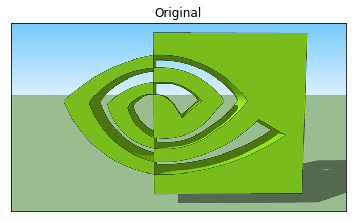

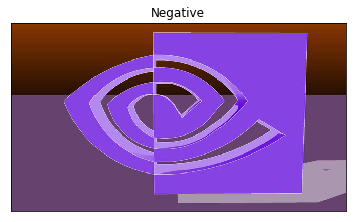

In [4]:
img = cv2.imread('nvidia.JPG')

res = 255 - img

# OpenCV represents RGB images as multi-dimensional NumPy arrays…but in reverse order!
# This means that images are actually represented in BGR order rather than RGB!
# Hence need to use cv2.cvtColor(res, cv2.COLOR_BGR2RGB) instead of res

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB)),plt.title('Negative')
plt.xticks([]), plt.yticks([])
plt.show()

## Perform Bluring operations

### How is blurring done?

Images like any digital signal signals have frequency components.
These frequency components are determined by the number of edges or the smoothness of an image.
Smooth surfaces indicates low frequency components and the edges represent the high frequency component of the image.

Blurring is a process of removing the high frequency component of the image.
In other words its a low pass Filter.

Eg:
Consider an image array 

\begin\{equation} A =
\begin{bmatrix}
0 & 255 & 255 & 0\\
0 & 255 & 255 & 0\\
0 & 255 & 255 & 0\\
0 & 255 & 255 & 0\\
\end{bmatrix}
\end\{equation}

Consider an array of all ones of the same dimensions as the image array:

\begin\{equation} B =
\begin{bmatrix}
1 & 1 & 1 & 1\\
1 & 1 & 1 & 1\\
1 & 1 & 1 & 1\\
1 & 1 & 1 & 1\\
\end{bmatrix}
\end\{equation}

The convolution of A and B gives:

\begin\{equation} Conv(A,B) =
\begin{bmatrix}
0 & 63.75 & 127.5 & 63.75\\
0 & 127.5 & 255 & 127.5\\
0 & 127.5 & 255 & 127.5\\
0 & 63.75 & 127.5 & 63.75\\
\end{bmatrix}
\end\{equation}


### Blurring by Linear Filtering

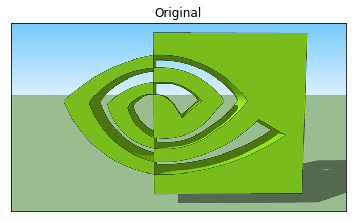

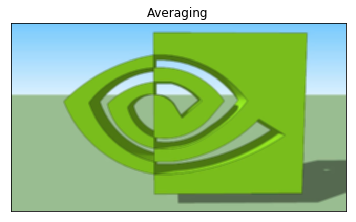

In [5]:
img = cv2.imread('nvidia.JPG')

kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

## Blurring by Gaussian Filtering

### Working of Gaussian Filter

The Gaussian blur is a type of image-blurring filter that uses a Gaussian function for calculating the transformation to apply to each pixel in the image. The equation of a Gaussian function in one dimension is

\begin\{equation}G(x)={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {x^{2}}{2\sigma ^{2}}}}\end\{equation}

A 5X5 gaussian matrix is represented as :
\begin\{equation}
{\frac {1}{256}}{\begin{bmatrix}1&4&6&4&1\\4&16&24&16&4\\6&24&36&24&6\\4&16&24&16&4\\1&4&6&4&1\end{bmatrix}}
\end\{equation}

The convolution of the the gaussian Filter Kernel on the image array gives an edge smoothed output.

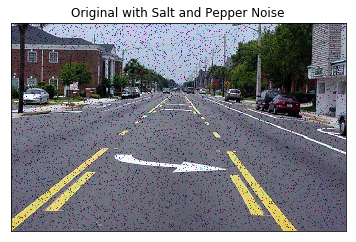

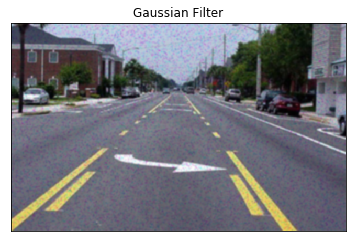

In [26]:
img = cv2.imread('image/saltPepper.jpg')

kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)
gauss = cv2.GaussianBlur(img,(7,7),0)


plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.title('Original with Salt and Pepper Noise')
plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(cv2.cvtColor(gauss, cv2.COLOR_BGR2RGB)),plt.title('Gaussian Filter')
plt.xticks([]), plt.yticks([])
plt.show()


## Blurring using Median Filtering

Consider a 1D array:

x = (2, 80, 6, 3).

So, the median filtered output signal y will be:

y1 = med(2, 2, 80) = 2

y2 = med(2, 80, 6) = med(2, 6, 80) = 6

y3 = med(80, 6, 3) = med(3, 6, 80) = 6

y4 = med(6, 3, 3) = med(3, 3, 6) = 3

i.e. y = (2, 6, 6, 3)

##### For an image array, a kernel size of 3 - 5 (Image matrix of size 3x3 - 5x5) is taken. The values are lined up row-wise or column-wise and the median of the output is calculated.

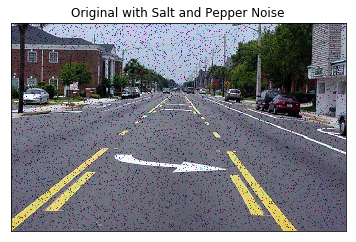

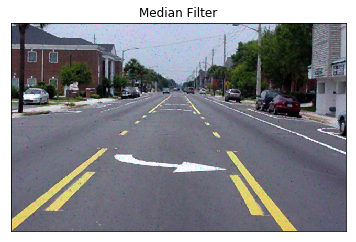

In [27]:
img = cv2.imread('image/saltPepper.jpg')
median = cv2.medianBlur(img,3)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.title('Original with Salt and Pepper Noise')
plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(cv2.cvtColor(median, cv2.COLOR_BGR2RGB)),plt.title('Median Filter')
plt.xticks([]), plt.yticks([])
plt.show()

## Edge detection using different algorithms

### Identifying objects immersed in images is the main application of edge detection.

Edge detection aims at identifying points in a digital image at which the image brightness changes sharply. 

#### What is an edge?

The points at which image brightness changes sharply are typically organized into a set of curved line segments.

#### What is the need for edge detection?

Edge detection is a fundamental tool in image processing, machine vision and computer vision, particularly in the areas of feature detection and feature extraction

#### Math behind edge detection

The Edge Detection algorithms are based on finding the gradient and setting a threshold that qualifies as an edge.

For example from the below image pixel map the variantion from 4th pixel to the 5th pixel is larger than the 3rd pixel to the 4th pixel. 

<table style="border:0; margin:0.5em auto">
<tbody><tr>
<td style="border:1px solid #000; padding:5px 10px;">5
</td>
<td style="border:1px solid #000; padding:5px 10px;">7
</td>
<td style="border:1px solid #000; padding:5px 10px;">6
</td>
<td style="border:1px solid #000; padding:5px 10px;">4
</td>
<td style="border:1px solid #000; padding:5px">152
</td>
<td style="border:1px solid #000; padding:5px">148
</td>
<td style="border:1px solid #000; padding:5px">149
</td></tr>
<tr style="height:30px">
<td style="background:#050505">
</td>
<td style="background:#070707">
</td>
<td style="background:#060606">
</td>
<td style="background:#040404">
</td>
<td style="background:#989898">
</td>
<td style="background:#949494">
</td>
<td style="background:#959595">
</td></tr></tbody></table>


#### Known edge detection methods:

1. Sobel X and Sobel Y algorithms
2. Laplacian
3. Canny's

#### 1. Sobel X and Sobel Y algorithms

\begin\{equation} SobelX =
\begin{bmatrix}
1 & 0 & -1\\
2 & 0 & -2\\
1 & 0 & -1\\
\end{bmatrix} * A
\end\{equation}

\begin\{equation} SobelY =
\begin{bmatrix}
1 & 2 & 1\\
0 & 0 & 0\\
-1 & -2 & -1\\
\end{bmatrix}  * A
\end\{equation}

For example the sobel Kernel is convolved with the kernel
![sobelX.png](image/sobelX_resize.png)

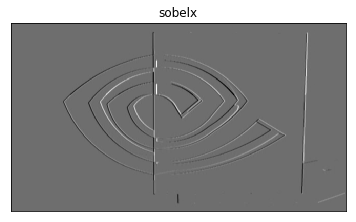

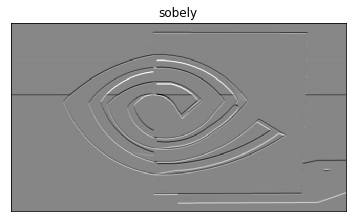

In [28]:
img = cv2.imread('nvidia.JPG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.imshow(sobelx, cmap = 'gray'),plt.title('sobelx')
plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(sobely, cmap = 'gray'),plt.title('sobely')
plt.xticks([]), plt.yticks([])
plt.show()


#### 2. Laplacian Edge Detection

The two Dimensional Laplacian operator:
\begin\{equation}
{\displaystyle \Delta f={\frac {\partial ^{2}f}{\partial x^{2}}}+{\frac {\partial ^{2}f}{\partial y^{2}}}}
\end\{equation}

The laplacian Kernel looks like this
![lapmask2.gif](image/lapmask2.gif)

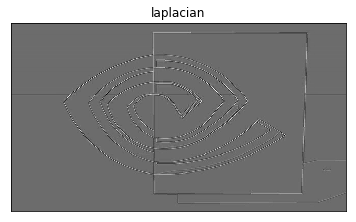

In [47]:
img = cv2.imread('nvidia.JPG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

laplacian = cv2.Laplacian(img,cv2.CV_64F)

plt.imshow(laplacian, cmap = 'gray'),plt.title('laplacian')
plt.xticks([]), plt.yticks([])
plt.show()

### Edge Detection on a Gaussian Filtered Image

The Edge detection is more precise on a filtered image as the unwanted noise is removed and the edges are clearly well defined.

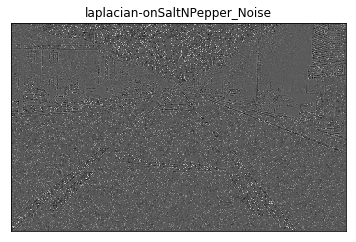

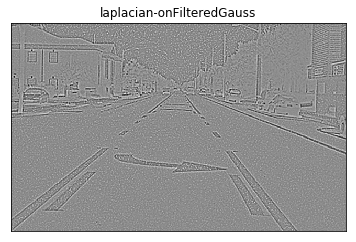

In [37]:
img = cv2.imread('image/saltPepper.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gauss = cv2.GaussianBlur(img,(5,5),0)

laplacian = cv2.Laplacian(img,cv2.CV_64F)

plt.imshow(laplacian, cmap = 'gray'),plt.title('laplacian-onSaltNPepper_Noise')
plt.xticks([]), plt.yticks([])
plt.show()

laplacian = cv2.Laplacian(gauss,cv2.CV_64F)

plt.imshow(laplacian, cmap = 'gray'),plt.title('laplacian-onFilteredGauss')
plt.xticks([]), plt.yticks([])
plt.show()


### Edge Detection on a Median Filtered Image

A speciality of median filters is that they retain the edges while filtering.
Hence it is the most preffered before using any edge detection algorithms.

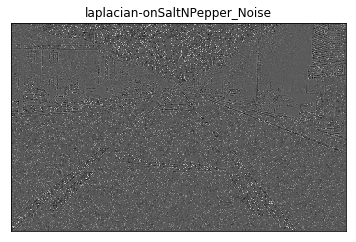

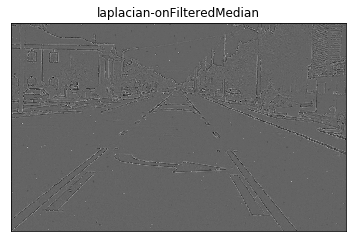

In [38]:
img = cv2.imread('image/saltPepper.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

median = cv2.medianBlur(img,3)

laplacian = cv2.Laplacian(img,cv2.CV_64F)

plt.imshow(laplacian, cmap = 'gray'),plt.title('laplacian-onSaltNPepper_Noise')
plt.xticks([]), plt.yticks([])
plt.show()

laplacian = cv2.Laplacian(median,cv2.CV_64F)

plt.imshow(laplacian, cmap = 'gray'),plt.title('laplacian-onFilteredMedian')
plt.xticks([]), plt.yticks([])
plt.show()

### Edge detection by negating the Gaussian output to the original image

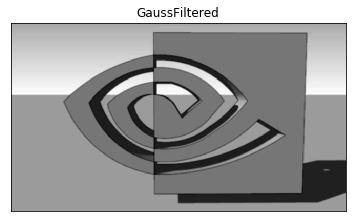

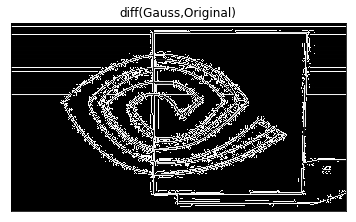

In [41]:
img = cv2.imread('nvidia.JPG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gauss = cv2.GaussianBlur(img,(5,5),0)

output = gauss - img

plt.imshow(gauss, cmap = 'gray'),plt.title('GaussFiltered')
plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(output, cmap = 'gray'),plt.title('diff(Gauss,Original)')
plt.xticks([]), plt.yticks([])
plt.show()


### Computational image corruption

It is a type of image corruption caused due to improper image processing, filesystem errors etc.

The following corruption is caused due to memory corruption

<img src="image/corrupt_image4.JPG" />

##### Unlike other random noise like salt and Pepper and speckle noise, noise caused due to filesystem erros or image processing cannot be filtered easily.

#### Sharpening filters will be used to detect the edges of the corrupted portion of the image

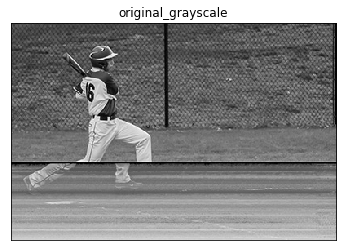

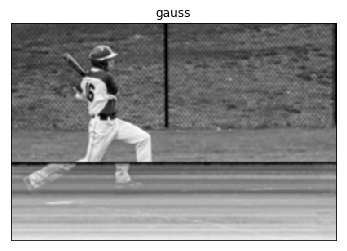

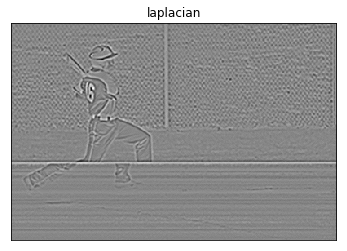

In [43]:
img = cv2.imread('corrupt_image4.JPG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gauss = cv2.GaussianBlur(img,(5,5),0)

laplacian = cv2.Laplacian(gauss,cv2.CV_64F)

output = laplacian + gauss

plt.imshow(img, cmap = 'gray'),plt.title('original_grayscale')
plt.xticks([]), plt.yticks([])
plt.show()


plt.imshow(gauss, cmap = 'gray'),plt.title('gauss')
plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(laplacian, cmap = 'gray'),plt.title('laplacian-on-Gauss-Filtered')
plt.xticks([]), plt.yticks([])
plt.show()


### Canny edge detection

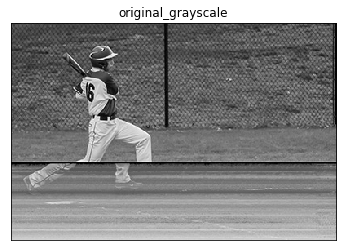

interactive(children=(IntSlider(value=200, description='i', max=600, min=-200), IntSlider(value=10, descriptio…

interactive(children=(IntSlider(value=200, description='i', max=600, min=-200), IntSlider(value=10, descriptio…

<function __main__.canny(i, j)>

In [44]:
from ipywidgets import *

i=0
img = cv2.imread('corrupt_image4.JPG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img, cmap = 'gray'),plt.title('original_grayscale')
plt.xticks([]), plt.yticks([])
plt.show()

def canny(i,j):
    canny = cv2.Canny(img,i,255)
    plt.imshow(canny, cmap = 'gray'),plt.title('canny_edge_detection')
    plt.xticks([]), plt.yticks([])
    plt.show()
    output = gauss + j*canny
    plt.imshow(output, cmap = 'gray'),plt.title('sharpened output')
    plt.xticks([]), plt.yticks([])
    plt.show()

interact(canny,i=200,j=10)

def canny(i,j):
    median = cv2.medianBlur(img,3)
    canny = cv2.Canny(median,i,255)
    plt.imshow(canny, cmap = 'gray'),plt.title('canny_edge_detection')
    plt.xticks([]), plt.yticks([])
    plt.show()
    output = gauss + j*canny
    plt.imshow(output, cmap = 'gray'),plt.title('sharpened output')
    plt.xticks([]), plt.yticks([])
    plt.show()

interact(canny,i=200,j=10)
